In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import LeakyReLU, Dropout
from tensorflow.keras.layers import BatchNormalization

In [3]:
def generator(img_shape):
    G = Sequential()
    dropout = 0.4
    depth = 64+64+64+64
    dim = 7
    # In: 100
    # Out: dim x dim x depth
    G.add(Dense(dim*dim*depth, input_dim=100))
    G.add(BatchNormalization(momentum=0.9))
    G.add(Activation('relu'))
    G.add(Reshape((dim, dim, depth)))
    G.add(Dropout(dropout))

    # In: dim x dim x depth
    # Out: 2*dim x 2*dim x depth/2
    G.add(UpSampling2D())
    G.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
    G.add(BatchNormalization(momentum=0.9))
    G.add(Activation('relu'))

    G.add(UpSampling2D())
    G.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
    G.add(BatchNormalization(momentum=0.9))
    G.add(Activation('relu'))

    G.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
    G.add(BatchNormalization(momentum=0.9))
    G.add(Activation('relu'))

    # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
    G.add(Conv2DTranspose(img_shape[2], 5, padding='same'))
    G.add(Activation('sigmoid'))
    print("Generator")
    G.summary()
    return G

In [4]:
image_shape=(28,28,1)
G=generator(image_shape)

Discriminator: input shape: (28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 

In [5]:
G.load_weights("model")

In [6]:
def to_three(img):
    '''
    converts grayscale image to three channels
    (height,width) ->(height,width,3)
    needed for OpenCV to display the image
    '''
    img2 = np.zeros((28,28,3))
    img2[:,:,0] = img
    img2[:,:,1] = img
    img2[:,:,2] = img
    img2=(img2*255).astype('uint8')
    img2=cv2.resize(img2,(400,400))
    return img2

In [7]:
def printNoice(noice):
    x=[]
    x.append(noice)
    x=np.array(x)
    pic=G.predict(x)
    pic=to_three(pic[0][:,:,0])
    return pic

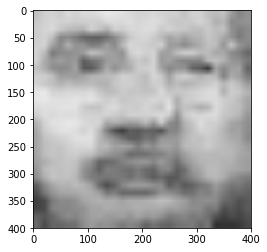

In [8]:
noice=np.random.uniform(-1,1,(100))
plt.imshow(printNoice(noice))

end
[ 0.32102877 -0.7485203  -0.34189461  0.9857432  -0.72851682  0.56130574
  0.08148908 -0.83247152 -0.4181655   0.14054688  0.75017743  0.05264888
 -0.02210401  0.25109071 -0.79685453  0.83167211  0.72012928 -0.32094177
  0.66365414 -0.23292779 -0.25849759 -0.66388611  0.31325359  0.56062394
 -0.41168872 -0.66683766  0.97913446  0.54190288  0.61255087  0.38394033
 -0.0623925   0.08218859  0.95588366 -0.81793768 -0.11197658 -0.13862597
  0.91619727  0.74273361  0.56167884  0.01814872 -0.61014178 -0.44210741
 -0.00654284  0.38610089  0.90743365  0.54831086 -0.68235228  0.41678216
  0.06329295  0.77811146  0.7229527  -0.8859422  -0.20870007 -0.13529227
  0.68948295  0.08042112  0.42854802 -0.95123404  0.32303156  0.75586422
 -0.01264342  0.82548898 -0.90857561 -0.55774364  0.02976629  0.87148342
  0.14208161  0.69204056 -0.58338252 -0.40740438  0.5795552   0.5687086
  0.20413959 -0.84394891  0.28407304 -0.86796264 -0.97996463 -0.94699413
  0.14069575 -0.18210861  0.13990272 -0.73536079

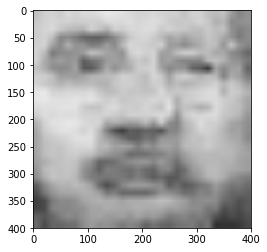

In [9]:
import time
v1=np.random.uniform(-1,1,(100))
#print(noice)
go=True
while go:
    #pick random vector
    v2=np.random.uniform(-1,1,(100))
    delta=(v2-v1)/20
    #pick random value
    for i in range(20):
        v1=v1+delta
        pic=printNoice(v1)
        cv2.imshow('Video',pic)
        #print(".",end="")
        if cv2.waitKey(1) & 0xFF == ord('q'):
            go=False
            break
        time.sleep(0.04)
    #print(noice)
        
    
print("end")
print(noice)
cv2.destroyAllWindows()
plt.imshow(printNoice(noice))